In [1]:
# importing neccessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

import seaborn as sns

In [2]:
#name of file to be read in

file = 'median_clean_eguage_hour_dataset.csv'

In [3]:
data = pd.read_csv(file)  # reading in the file with pandas

In [4]:
data.columns #checking the column of the files

Index(['localhour', 'state', 'city', 'building_type', 'month', 'time', 'hour',
       'weekday', 'air1', 'furnace1', 'refrigerator1', 'air2', 'car1', 'drye1',
       'poolpump1', 'waterheater1', 'livingroom1', 'lights_plugs1', 'furnace2',
       'office1', 'dishwasher1', 'bedroom1', 'jacuzzi1'],
      dtype='object')

In [6]:
data.head()

,localhour,state,city,building_type,month,time,hour,weekday,air1,furnace1,...,drye1,poolpump1,waterheater1,livingroom1,lights_plugs1,furnace2,office1,dishwasher1,bedroom1,jacuzzi1
0,2015-01-07 16:00:00-06:00,Texas,Austin,Single-Family Home,1,16:00:00,16,Weekday,0.0,0.007000,...,0.000000,0.505621,0.198917,0.114672,0.055216,0.084282,0.098459,0.0,0.036082,0.067749
1,2015-01-01 00:00:00-06:00,Texas,Austin,Single-Family Home,1,00:00:00,0,Weekday,0.0,0.169267,...,0.003617,0.379417,0.145688,0.081652,0.047012,0.102120,0.105259,0.0,0.037840,0.045157
2,2015-01-01 01:00:00-06:00,Texas,Austin,Single-Family Home,1,01:00:00,1,Weekday,0.0,0.223817,...,0.003400,0.370550,0.146686,0.062823,0.041560,0.090775,0.096395,0.0,0.035923,0.067457
3,2015-01-01 02:00:00-06:00,Texas,Austin,Single-Family Home,1,02:00:00,2,Weekday,0.0,0.133800,...,0.001817,0.384681,0.116055,0.056300,0.038971,0.105281,0.091374,0.0,0.035108,0.064672
4,2015-01-01 03:00:00-06:00,Texas,Austin,Single-Family Home,1,03:00:00,3,Weekday,0.0,0.122317,...,0.001867,0.427062,0.107802,0.052568,0.038132,0.122752,0.091826,0.0,0.034938,0.067693


In [ ]:
#Subseting the data set into training and test set

In [7]:
x_train = data[data['state'] != 'California']

In [8]:
x_test = data[data['state'] == 'California']

In [9]:
# drop columns not needed for training
x_train = x_train.drop(['localhour', 'state', 'city', 'building_type', 'month', 'time', 'hour',
       'weekday'], axis = 1)

In [10]:
# drop columns not needed for training
x_test = x_test.drop(['localhour', 'state', 'city', 'building_type', 'month', 'time', 'hour',
       'weekday'], axis = 1)

In [12]:
## Getting the values from dataframe into a list
x_train =  x_train.values
x_test  = x_test.values

In [14]:
#importing the neccessary packages for the deep learning model
import os
import pandas as pd
import numpy as np
import scipy

from keras.layers import Lambda, Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras.losses import mse, binary_crossentropy
from keras.utils import plot_model
from keras import backend as K

import matplotlib.pyplot as plt
import argparse

from numpy.random import seed
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from keras import losses

Using TensorFlow backend.


In [15]:
data.shape

(4681705, 23)

In [16]:
data.head()

,localhour,state,city,building_type,month,time,hour,weekday,air1,furnace1,...,drye1,poolpump1,waterheater1,livingroom1,lights_plugs1,furnace2,office1,dishwasher1,bedroom1,jacuzzi1
0,2015-01-07 16:00:00-06:00,Texas,Austin,Single-Family Home,1,16:00:00,16,Weekday,0.0,0.007000,...,0.000000,0.505621,0.198917,0.114672,0.055216,0.084282,0.098459,0.0,0.036082,0.067749
1,2015-01-01 00:00:00-06:00,Texas,Austin,Single-Family Home,1,00:00:00,0,Weekday,0.0,0.169267,...,0.003617,0.379417,0.145688,0.081652,0.047012,0.102120,0.105259,0.0,0.037840,0.045157
2,2015-01-01 01:00:00-06:00,Texas,Austin,Single-Family Home,1,01:00:00,1,Weekday,0.0,0.223817,...,0.003400,0.370550,0.146686,0.062823,0.041560,0.090775,0.096395,0.0,0.035923,0.067457
3,2015-01-01 02:00:00-06:00,Texas,Austin,Single-Family Home,1,02:00:00,2,Weekday,0.0,0.133800,...,0.001817,0.384681,0.116055,0.056300,0.038971,0.105281,0.091374,0.0,0.035108,0.064672
4,2015-01-01 03:00:00-06:00,Texas,Austin,Single-Family Home,1,03:00:00,3,Weekday,0.0,0.122317,...,0.001867,0.427062,0.107802,0.052568,0.038132,0.122752,0.091826,0.0,0.034938,0.067693


In [17]:
# network parameters
original_dim = x_train.shape[1]
input_shape = (original_dim, )
intermediate_dim = 300
batch_size = 128
latent_dim = 2
epochs = 30

In [19]:
# VAE model = encoder + decoder
# build encoder model
inputs = Input(shape=input_shape, name='encoder_input')
x = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

Instructions for updating:
Colocations handled automatically by placer.


In [20]:
# reparameterization trick
# instead of sampling from Q(z|X), sample epsilon = N(0,I)
# z = z_mean + sqrt(var) * epsilon
def sampling(args):
    """Reparameterization trick by sampling from an isotropic unit Gaussian.
    # Arguments
        args (tensor): mean and log of variance of Q(z|X)
    # Returns
        z (tensor): sampled latent vector
    """

    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean = 0 and std = 1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

In [21]:
# use reparameterization trick to push the sampling out as input
# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

In [22]:
encoder = Model(inputs, z_mean)
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 15)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               4800      
_________________________________________________________________
z_mean (Dense)               (None, 2)                 602       
Total params: 5,402
Trainable params: 5,402
Non-trainable params: 0
_________________________________________________________________


In [23]:
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(original_dim, activation='sigmoid')(x)

In [24]:
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
z_sampling (InputLayer)      (None, 2)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               900       
_________________________________________________________________
dense_3 (Dense)              (None, 15)                4515      
Total params: 5,415
Trainable params: 5,415
Non-trainable params: 0
_________________________________________________________________


In [25]:
outputs = decoder(encoder(inputs))  # output of the decoder
vae = Model(inputs, outputs, name='vae_mlp')  

In [26]:
# Loss function for the VAE
def vae_loss(x, x_decoded_mean):
    xent_loss = losses.mae(x, x_decoded_mean)
    kl_loss = - 0.5 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return xent_loss + kl_loss

In [27]:
vae.compile(optimizer='rmsprop', loss=vae_loss) # compliing the model

In [28]:
##Training the model 
results = vae.fit(x_train, x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, x_test))

Instructions for updating:
Use tf.cast instead.
Train on 4516550 samples, validate on 165155 samples
Epoch 1/30
4516550/4516550 [==============================] - 133s 29us/step - loss: 0.0576 - val_loss: 0.0348
Epoch 2/30
4516550/4516550 [==============================] - 132s 29us/step - loss: 0.0537 - val_loss: 0.0344
Epoch 3/30
4516550/4516550 [==============================] - 132s 29us/step - loss: 0.0528 - val_loss: 0.0343
Epoch 4/30
4516550/4516550 [==============================] - 132s 29us/step - loss: 0.0523 - val_loss: 0.0332
Epoch 5/30
4516550/4516550 [==============================] - 132s 29us/step - loss: 0.0519 - val_loss: 0.0323
Epoch 6/30
4516550/4516550 [==============================] - 135s 30us/step - loss: 0.0517 - val_loss: 0.0315
Epoch 7/30
4516550/4516550 [==============================] - 132s 29us/step - loss: 0.0514 - val_loss: 0.0305
Epoch 8/30
4516550/4516550 [==============================] - 158s 35us/step - loss: 0.0512 - val_loss: 0.0302
Epoch 9/30


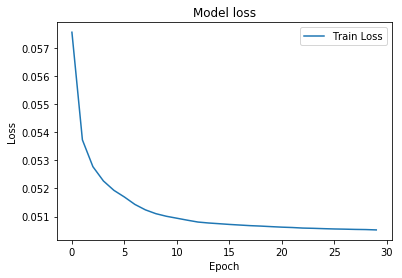

In [29]:
# Plot training & validation loss values
plt.plot(results.history['loss'])
# plt.plot(results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation'], loc='upper right')
plt.show()

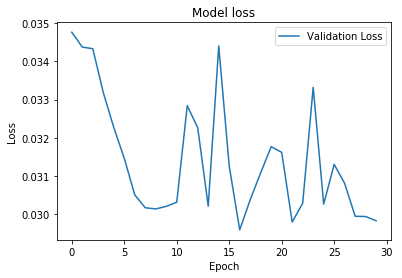

In [30]:
# plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Validation Loss'], loc='upper right')
plt.show()

In [31]:
## Predict on the California data

preds = vae.predict(x_test, batch_size=batch_size)

In [32]:
## Predict on the California data

preds_old = vae.predict(x_test, batch_size=batch_size)

In [33]:
preds_old.shape

(165155, 15)

In [34]:
preds.shape

(165155, 15)

In [35]:
x_test.shape

(165155, 15)

In [44]:
plot_title = list(data.columns[-15:])

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


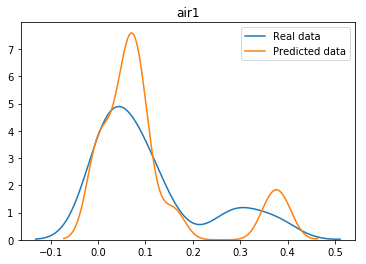

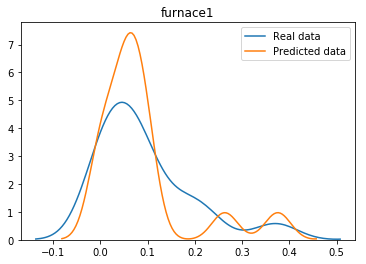

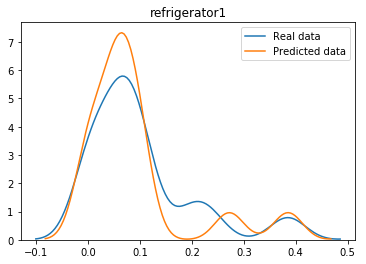

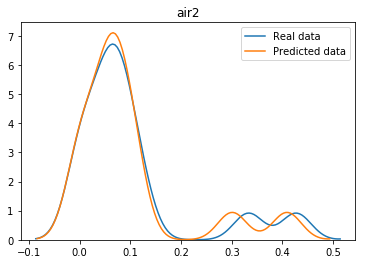

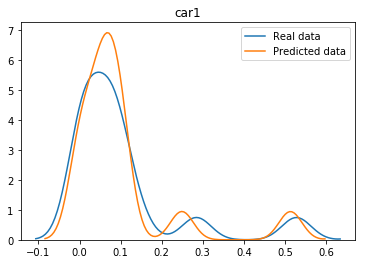

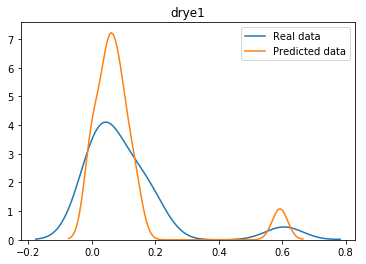

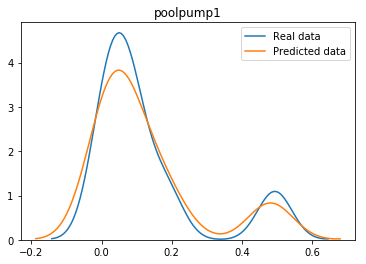

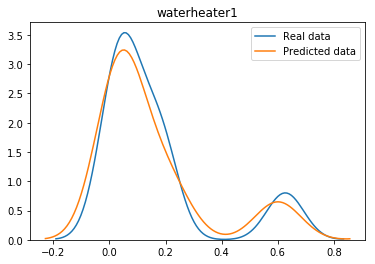

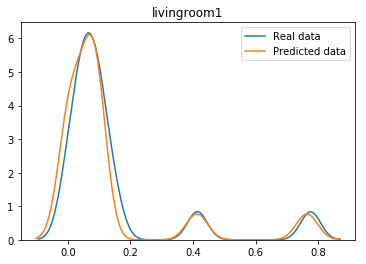

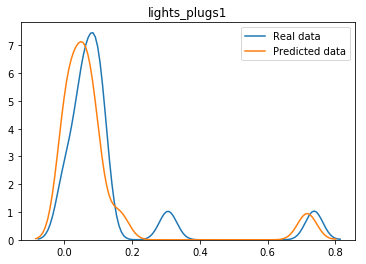

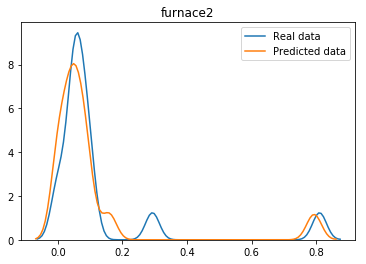

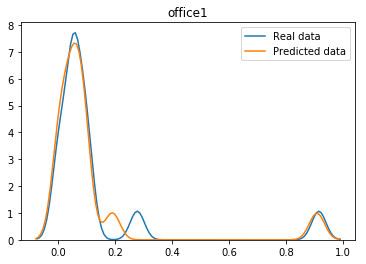

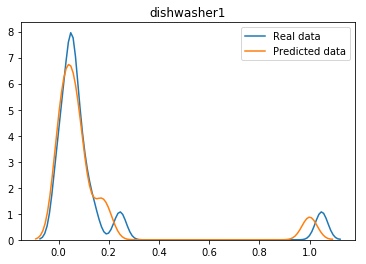

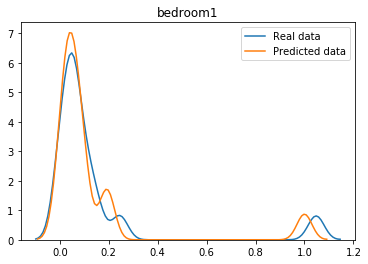

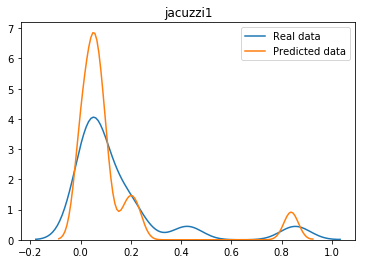

In [47]:
import seaborn as sns;

#looping through all the columns to compare the reconstructed data and the real data
for i in range(15):
    sns.kdeplot(x_test[i],  label="Real data")
    sns.kdeplot(preds[i], label="Predicted data")
    plt.title(plot_title[i])
    plt.legend();
    plt.show()